In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import random as rand

In [2]:
def read_data(path):
    x=[]
    with open(path) as file:
        for line in file:
            x.append([])
            for i,value in enumerate(line.split()):
                x[len(x)-1].append(float(value))
        file.close()
    return x

In [3]:
x=read_data("../hw8_nolabel_train.dat")

In [4]:
k_list=[2,4,6,8,10]
times=500

In [5]:
Ein_record_avg=[]
for k in k_list:
    Ein_record=[]
    for t in range(times):
        mu_k_index=rand.sample(range(len(x)), k)
        mu_k=[ x[i] for i in mu_k_index ]
        cluster=[0]*len(x)
        prev_cluster=[1]*len(x)
        while True:
            for i in range(len(x)):
                distance=[0]*k
                for j in range(len(mu_k)):
                    distance[j]=sum([(a-b)*(a-b) for a,b in zip(x[i],mu_k[j])])
                cluster[i]=distance.index(min(distance))
            if prev_cluster==cluster:
                break
            else:
                prev_cluster=cluster.copy()
            for j in range(k):
                indexes= [i for i, value in enumerate(cluster) if value == j]
                temp =[ x[i] for i in indexes]
                for n in range(1,len(temp)):
                    temp[0]=[temp[0][i]+temp[n][i] for i in range(len(temp[0]))]
                mu_k[j]=temp[0].copy()
                mu_k[j]=[ i/len(temp) for i in mu_k[j] ]
        Ein=0
        for i in range(len(x)):
            temp=[x[i][j]-mu_k[cluster[i]][j] for j in range(len(x[0]))]
            temp=[j*j for j in temp]
            Ein+=sum(temp)
        Ein/=len(x)
        Ein_record.append(Ein)
    Ein_record_avg.append(sum(Ein_record)/len(Ein_record))

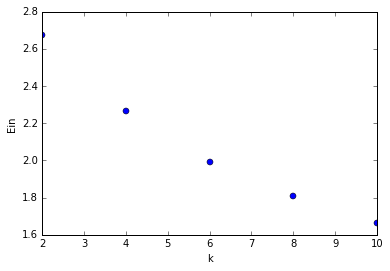

In [6]:
plt.plot(k_list,Ein_record_avg,"o")
plt.ylabel("Ein")
plt.xlabel("k")

In [7]:
print(Ein_record_avg)

[2.6747701328123807, 2.2654913994206884, 1.993585214527386, 1.8086047786732224, 1.6641049388303406]
